
Input to the network:
Shape: torch.Size([1000, 5]), Mean: 0.0239, Std: 1.0148

After Linear Layer 1:
Shape: torch.Size([1000, 10]), Mean: 0.1085, Std: 0.6442
After BatchNorm Layer 1:
Shape: torch.Size([1000, 10]), Mean: -0.0000, Std: 1.0000
After ReLU Layer 1:
Shape: torch.Size([1000, 10]), Mean: 0.3987, Std: 0.5826

After Linear Layer 2:
Shape: torch.Size([1000, 10]), Mean: -0.0027, Std: 0.4290
After BatchNorm Layer 2:
Shape: torch.Size([1000, 10]), Mean: -0.0000, Std: 1.0000
After ReLU Layer 2:
Shape: torch.Size([1000, 10]), Mean: 0.3837, Std: 0.5941

After Final Linear Layer:
Shape: torch.Size([1000, 3]), Mean: 0.0140, Std: 0.3782

Input to the network:
Shape: torch.Size([1000, 5]), Mean: 0.0239, Std: 1.0148

After Linear Layer 1:
Shape: torch.Size([1000, 10]), Mean: 0.1088, Std: 0.6471
After BatchNorm Layer 1:
Shape: torch.Size([1000, 10]), Mean: 0.0020, Std: 1.0021
After ReLU Layer 1:
Shape: torch.Size([1000, 10]), Mean: 0.4005, Std: 0.5844

After Linear Layer 2:
Shape: torch.Siz

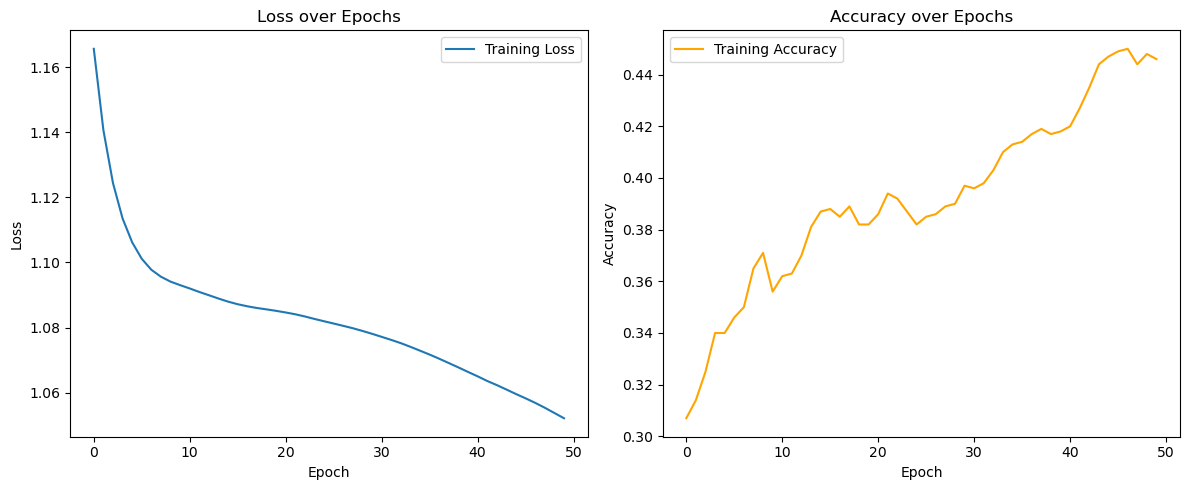

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the neural network with batch normalization
class NeuralNetWithBatchNorm(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetWithBatchNorm, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer
        self.bn1 = nn.BatchNorm1d(hidden_size)         # BatchNorm after first layer
        self.relu1 = nn.ReLU()                         # Activation function
        
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Hidden layer
        self.bn2 = nn.BatchNorm1d(hidden_size)         # BatchNorm after second layer
        self.relu2 = nn.ReLU()                         # Activation function
        
        self.fc3 = nn.Linear(hidden_size, output_size) # Output layer
    
    def forward(self, x):
        print("\nInput to the network:")
        print(f"Shape: {x.shape}, Mean: {x.mean().item():.4f}, Std: {x.std().item():.4f}")
        
        # First layer
        x = self.fc1(x)
        print("\nAfter Linear Layer 1:")
        print(f"Shape: {x.shape}, Mean: {x.mean().item():.4f}, Std: {x.std().item():.4f}")
        
        x = self.bn1(x)
        print("After BatchNorm Layer 1:")
        print(f"Shape: {x.shape}, Mean: {x.mean().item():.4f}, Std: {x.std().item():.4f}")
        
        x = self.relu1(x)
        print("After ReLU Layer 1:")
        print(f"Shape: {x.shape}, Mean: {x.mean().item():.4f}, Std: {x.std().item():.4f}")
        
        # Second layer
        x = self.fc2(x)
        print("\nAfter Linear Layer 2:")
        print(f"Shape: {x.shape}, Mean: {x.mean().item():.4f}, Std: {x.std().item():.4f}")
        
        x = self.bn2(x)
        print("After BatchNorm Layer 2:")
        print(f"Shape: {x.shape}, Mean: {x.mean().item():.4f}, Std: {x.std().item():.4f}")
        
        x = self.relu2(x)
        print("After ReLU Layer 2:")
        print(f"Shape: {x.shape}, Mean: {x.mean().item():.4f}, Std: {x.std().item():.4f}")
        
        # Output layer
        x = self.fc3(x)
        print("\nAfter Final Linear Layer:")
        print(f"Shape: {x.shape}, Mean: {x.mean().item():.4f}, Std: {x.std().item():.4f}")
        
        return x

# Generate random data for training
def generate_random_data(num_samples, input_size, output_size):
    X = torch.randn(num_samples, input_size)  # Random input data
    y = torch.randint(0, output_size, (num_samples,))  # Random labels (classification task)
    return X, y

# Training loop
def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=50):
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == y_train).sum().item()
        accuracy = correct / y_train.size(0)
        
        # Store metrics
        losses.append(loss.item())
        accuracies.append(accuracy)
        
        if (epoch + 1) % 10 == 0:
            print(f"\nEpoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")
    
    return losses, accuracies

# Plotting function
def plot_metrics(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(losses, label="Training Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label="Training Accuracy", color="orange")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Hyperparameters
    input_size = 5       # Number of input features
    hidden_size = 10     # Number of neurons in hidden layers
    output_size = 3      # Number of output classes
    num_samples = 1000   # Number of training samples
    learning_rate = 0.01 # Learning rate
    num_epochs = 50      # Number of training epochs
    
    # Generate random data
    X_train, y_train = generate_random_data(num_samples, input_size, output_size)
    
    # Define model, loss function, and optimizer
    model = NeuralNetWithBatchNorm(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()  # Loss function for classification
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Train the model
    losses, accuracies = train_model(model, criterion, optimizer, X_train, y_train, num_epochs)
    
    # Plot metrics
    plot_metrics(losses, accuracies)